# Final Project Data Mining Teori (Clustering+Regresi)

A.Muh.Asadul Hayyan
60900123028
Kelas B


In [98]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pickle



## Clustering

## Load Dataset

In [99]:
import pandas as pd
dfm = pd.read_csv("Mall_Customers.csv")
dfm.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [100]:
print(dfm.info())
print(dfm.describe())
print(dfm.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

## Scaling Data

In [101]:
X = dfm[['Age','Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

## Elbow Method

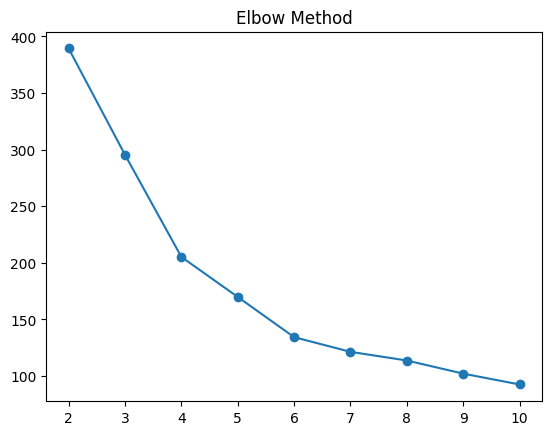

In [102]:
inertia=[]
for k in range(2,11):
    inertia.append(KMeans(n_clusters=k,random_state=42).fit(Xs).inertia_)

plt.plot(range(2,11),inertia,'o-')
plt.title("Elbow Method")
plt.show()

## Silhouette Score

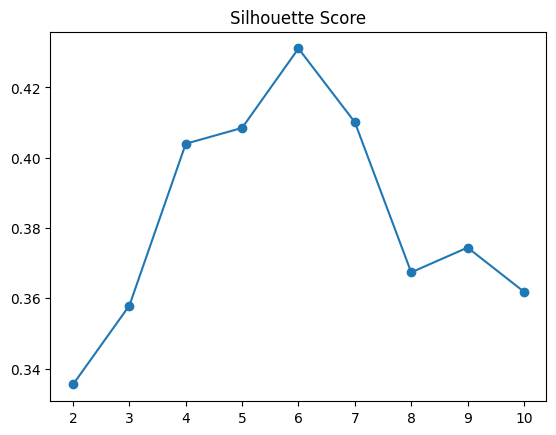

In [103]:
sil=[]
for k in range(2,11):
    sil.append(silhouette_score(Xs, KMeans(n_clusters=k,random_state=42).fit_predict(Xs)))

plt.plot(range(2,11),sil,'o-')
plt.title("Silhouette Score")
plt.show()

## Final Clustering (k=4)

In [104]:

X_cluster = dfm[['Age', 'Annual Income (k$)']]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
dfm['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

plt.show()
dfm.groupby('Cluster')[['Age','Annual Income (k$)']].mean()

,Age,Annual Income (k$)
Cluster,,
0,55.716667,49.916667
1,29.838710,70.467742
2,27.511628,29.697674
3,39.828571,99.171429


## Visualisasi Cluster

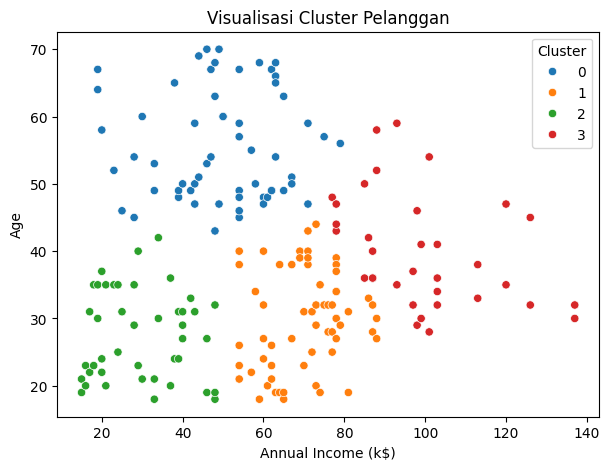

In [105]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=dfm,
    x='Annual Income (k$)',
    y='Age',
    hue='Cluster',
    palette='tab10'
)
plt.title("Visualisasi Cluster Pelanggan")
plt.show()


## Random Forest Regression

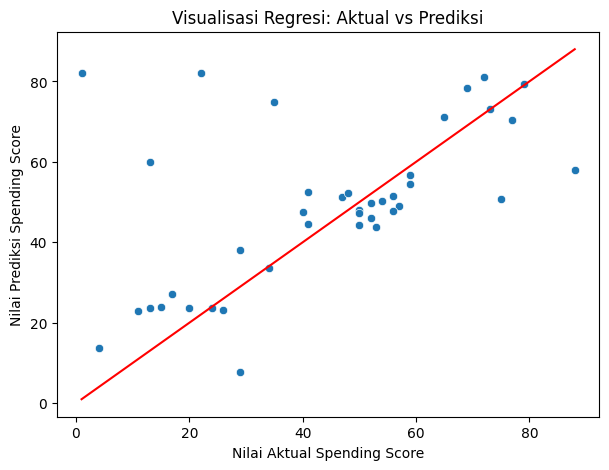

RMSE: 20.865470954585735
R2 Score: 0.11733055275999316


In [106]:
Xr = dfm[['Age', 'Annual Income (k$)']]
yr = dfm['Spending Score (1-100)']


X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

rmse, r2

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel("Nilai Aktual Spending Score")
plt.ylabel("Nilai Prediksi Spending Score")
plt.title("Visualisasi Regresi: Aktual vs Prediksi")
plt.show()

print("RMSE:", rmse)
print("R2 Score:", r2)


## Feature Importance

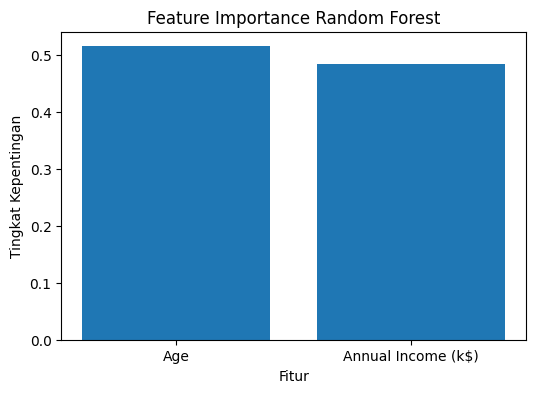

In [107]:
importance = rf.feature_importances_

feature_names = Xr.columns

fi_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

fi_df

plt.figure(figsize=(6,4))
plt.bar(fi_df['Fitur'], fi_df['Importance'])
plt.xlabel('Fitur')
plt.ylabel('Tingkat Kepentingan')
plt.title('Feature Importance Random Forest')
plt.show()

## Modelling (Save Model & Scaler)

In [108]:
with open("model_random_forest.pkl","wb") as f:
    pickle.dump(rf,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

print("Model & Scaler saved!")

Model & Scaler saved!


## Load Model

In [109]:
loaded_model = pickle.load(open("model_random_forest.pkl","rb"))
loaded_scaler = pickle.load(open("scaler.pkl","rb"))